In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
heart = pd.read_csv("fsv2heart.csv")

In [69]:
heart.iloc[0:5,:]

,thalach,oldpeak,ca,cp,thal_3,cp_0,exang,thal_2,slope_2,chol,age,cp_2,slope_1,target
0,150,2.3,0,3,0,0,0,0,0,233,63,0,0,1
1,187,3.5,0,2,0,0,0,1,0,250,37,1,0,1
2,172,1.4,0,1,0,0,0,1,1,204,41,0,0,1
3,178,0.8,0,1,0,0,0,1,1,236,56,0,0,1
4,163,0.6,0,0,0,1,1,1,1,354,57,0,0,1


In [70]:
heart.dtypes

thalach      int64
oldpeak    float64
ca           int64
cp           int64
thal_3       int64
cp_0         int64
exang        int64
thal_2       int64
slope_2      int64
chol         int64
age          int64
cp_2         int64
slope_1      int64
target       int64
dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'],random_state = 2,test_size = 0.2)

In [72]:
model=GaussianNB()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8852459016393442

In [73]:
model=GaussianNB()
cv_r2_scores_rf = cross_val_score(model,heart.drop('target', 1),heart['target'], cv=10,scoring='accuracy')
for row in cv_r2_scores_rf:
 print(row)
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

0.8387096774193549
0.8064516129032258
0.8387096774193549
0.9032258064516129
0.8387096774193549
0.7666666666666667
0.8333333333333334
0.8333333333333334
0.7241379310344828
0.7931034482758621
Mean 10-Fold R Squared: 0.8176381164256583


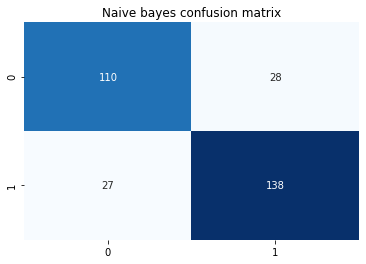

In [74]:
crossmodel = cross_val_predict(model,heart.drop('target', 1),heart['target'],cv=10)
conf_mat = confusion_matrix(heart['target'],crossmodel)
plt.title("Naive bayes confusion matrix")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)